In [ ]:
!pip install yfinance
!pip install darts
!pip uninstall matplotlib
!pip install matplotlib==3.1.3
!pip install pyyaml==5.4.1
!pip install holidays==0.13

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 6.4 MB 71.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 23.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 25.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
darts 0.19.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 27.8 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.14.2
    Uninstalling holidays-0.14.2:
      Successfully uninstalled holidays-0.14.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TCNModel
from darts.metrics import mape, mase, mae, rmse
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape, mse
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
BBNI = yf.download(['BBNI.jk'], 
                      start='2015-01-01', 
                      end='2022-01-01', 
                      progress=False).reset_index()

In [ ]:
BBNI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1752 non-null   datetime64[ns]
 1   Open       1752 non-null   float64       
 2   High       1752 non-null   float64       
 3   Low        1752 non-null   float64       
 4   Close      1752 non-null   float64       
 5   Adj Close  1752 non-null   float64       
 6   Volume     1752 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 95.9 KB


In [ ]:
BBNI

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,6050.0,6125.0,6050.0,6100.0,4923.147461,11700700
1,2015-01-05,6075.0,6075.0,6000.0,6025.0,4862.616699,13824800
2,2015-01-06,6000.0,6050.0,5950.0,6025.0,4862.616699,23801400
3,2015-01-07,6000.0,6100.0,5975.0,6075.0,4902.969727,19387800
4,2015-01-08,6100.0,6125.0,6025.0,6075.0,4902.969727,16755600
...,...,...,...,...,...,...,...
1747,2021-12-24,6650.0,6725.0,6575.0,6725.0,6603.161621,13733200
1748,2021-12-27,6725.0,6750.0,6675.0,6750.0,6627.708496,10650300
1749,2021-12-28,6750.0,6775.0,6700.0,6700.0,6578.614258,14716300
1750,2021-12-29,6700.0,6750.0,6675.0,6725.0,6603.161621,8425900


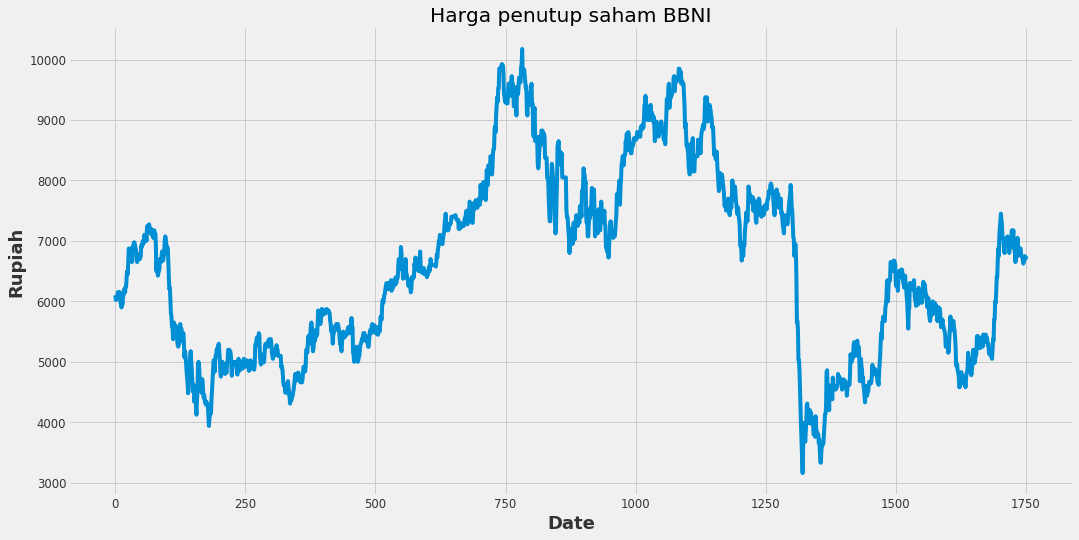

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Harga penutup saham BBNI')
plt.plot(BBNI['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Rupiah',fontsize=18)
plt.show()

In [ ]:
BBNI = BBNI.filter(['Date', 'Close'])

In [ ]:
full_dates = pd.DataFrame(pd.date_range(start = '2015-01-01', end = '2021-12-31', freq = 'D'), columns=['Date'])
data_fill = pd.merge(full_dates, BBNI, how='left', on='Date')
data_fill = data_fill.ffill()
data_fill = data_fill.bfill()
data_fill

,Date,Close
0,2015-01-01,6100.0
1,2015-01-02,6100.0
2,2015-01-03,6100.0
3,2015-01-04,6100.0
4,2015-01-05,6025.0
...,...,...
2552,2021-12-27,6750.0
2553,2021-12-28,6700.0
2554,2021-12-29,6725.0
2555,2021-12-30,6750.0


In [ ]:
BBNI.describe()

,Close
count,1752.000000
mean,6565.296804
std,1539.965557
min,3160.000000
25%,5250.000000
50%,6500.000000
75%,7606.250000
max,10175.000000


In [ ]:
BBNI.isnull().sum()

Date     0
Close    0
dtype: int64

**Skala data yang ideal memiliki jumlah yang relatif kecil**


In [ ]:
skala = (BBNI['Close'].max() - BBNI['Close'].min())*0.01
print(skala)

70.15


In [ ]:
data_ts = TimeSeries.from_dataframe(data_fill, 
                                    time_col = 'Date', 
                                    value_cols = 'Close',
                                    fill_missing_dates=True, freq='d')
scaler_target = Scaler()
data_ts_transformed = scaler_target.fit_transform(data_ts)
train_transformed, val_transformed = data_ts_transformed.split_before(pd.Timestamp('20211202'))

In [ ]:
data_ts

<TimeSeries (DataArray) (Date: 2557, component: 1, sample: 1)>
array([[[6100.]],

       [[6100.]],

       [[6100.]],

       ...,

       [[6725.]],

       [[6750.]],

       [[6750.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2015-01-01 2015-01-02 ... 2021-12-31
  * component  (component) object 'Close'
Dimensions without coordinates: sample

In [ ]:
train_transformed

<TimeSeries (DataArray) (Date: 2527, component: 1, sample: 1)>
array([[[0.41910192]],

       [[0.41910192]],

       [[0.41910192]],

       ...,

       [[0.54027085]],

       [[0.5188881 ]],

       [[0.49750535]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2015-01-01 2015-01-02 ... 2021-12-01
  * component  (component) object 'Close'
Dimensions without coordinates: sample

In [ ]:
model_TCN = TCNModel(
    input_chunk_length=2330,
    output_chunk_length=30,
    n_epochs=60,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,
)
model_TCN.fit(train_transformed, past_covariates=None, future_covariates=None, verbose=True)

[2022-06-06 05:08:55,566] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 168 samples.
[2022-06-06 05:08:55,566] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 168 samples.
2022-06-06 05:08:55 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 168 samples.
[2022-06-06 05:08:55,608] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 9
[2022-06-06 05:08:55,608] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 9
2022-06-06 05:08:55 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 9
[2022-06-06 05:08:55,632] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-06-06 05:08:55,632] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-06-06 05:08:55 darts.models.forecasting.torch_forecasting_model INFO: Time ser

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (_ResultMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


Predicting: 6it [00:00, ?it/s]

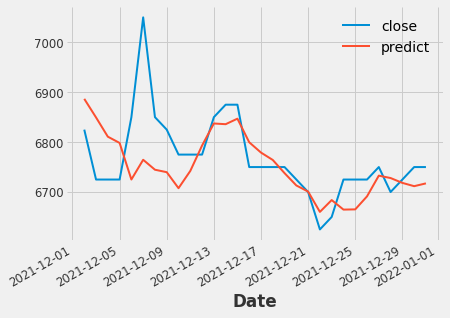

In [ ]:
pred = model_TCN.predict(30, past_covariates=None, num_samples=1)
pred_orig = scaler_target.inverse_transform(pred)

val_orig = scaler_target.inverse_transform(val_transformed)
val_orig.slice_intersect(pred_orig).plot(label='close')

pred_orig.plot(label='predict')
training = scaler_target.inverse_transform(train_transformed)

In [ ]:
mae_score = mae(val_orig, pred_orig)
rmse_score = rmse(val_orig, pred_orig)

print('TCN model MAE is: {}'.format(round(mae_score, 2)))
print('TCN model RMSE is: {}'.format(round(rmse_score)))

TCN model MAE is: 53.59
TCN model RMSE is: 76


In [ ]:
pd.merge(pred_orig.pd_dataframe().rename(columns = {'Close':'Predict'}), val_orig.pd_dataframe(), left_index=True, right_index=True)

component,Predict,Close
Date,,
2021-12-02,6886.706186,6825.0
2021-12-03,6849.400240,6725.0
2021-12-04,6810.895494,6725.0
2021-12-05,6798.346843,6725.0
2021-12-06,6725.060464,6850.0
2021-12-07,6764.608446,7050.0
2021-12-08,6744.667061,6850.0
2021-12-09,6739.753040,6825.0
2021-12-10,6707.683913,6775.0
